<a href="https://colab.research.google.com/github/Pippala-Rakshitha/Module-04-Lab-01/blob/main/AIML_III_Module_4_Lab_1_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Students Internship Batch of 2024**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

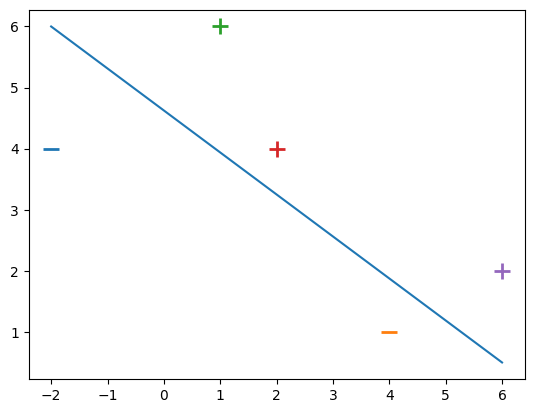

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

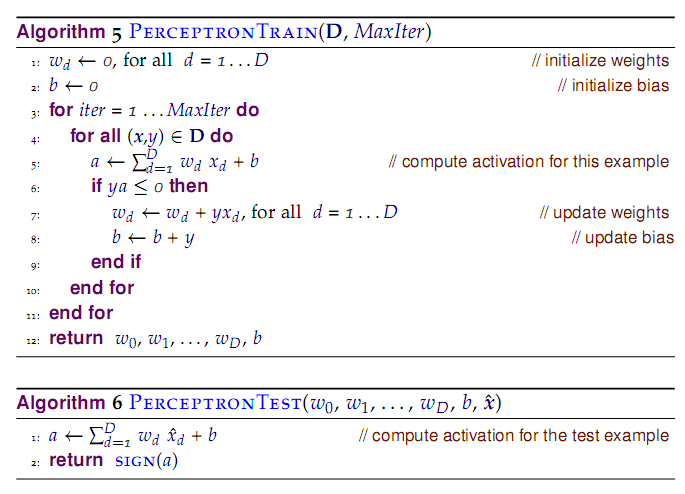

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

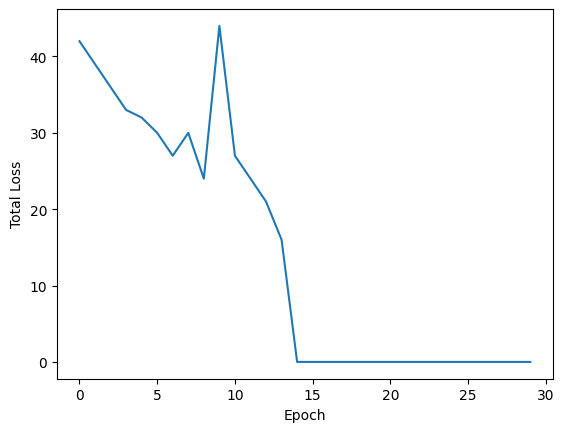

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

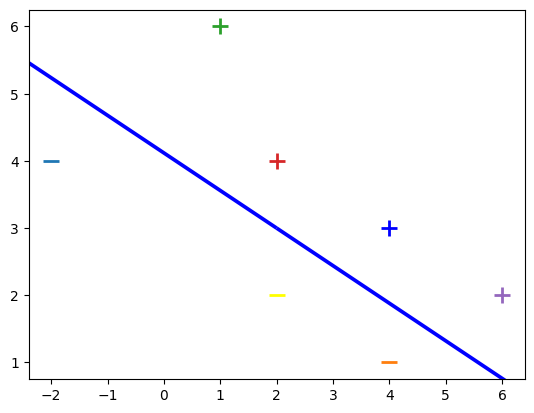

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



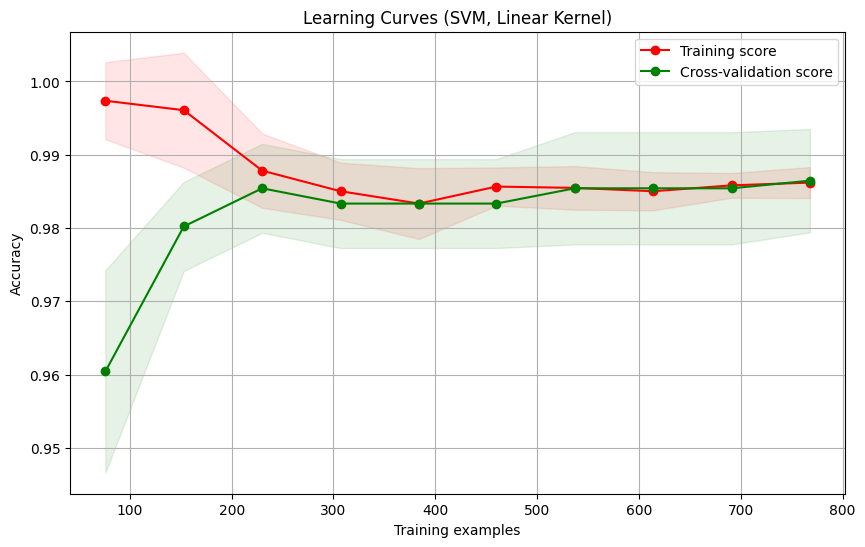

In [13]:
#1.Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.

import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
column_names = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
data = pd.read_csv(url, header=None, names=column_names)

# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Create a Support Vector Classifier
model = SVC(kernel='linear', random_state=42)
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curves (SVM, Linear Kernel)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()


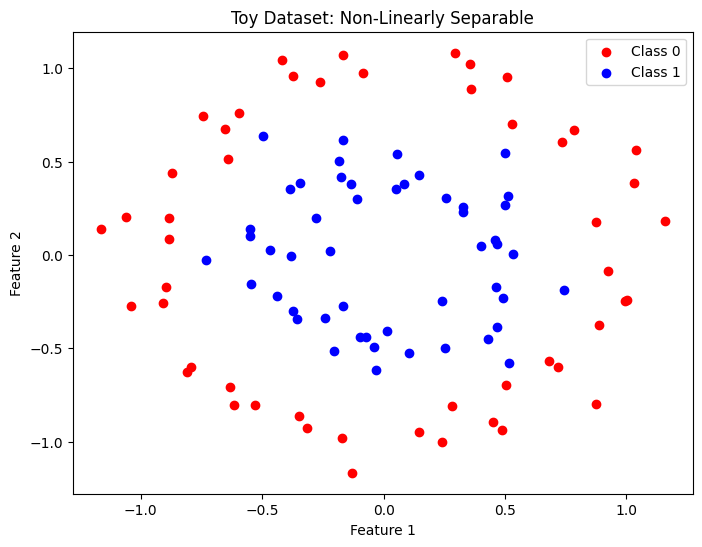

Accuracy on the training set: 0.47


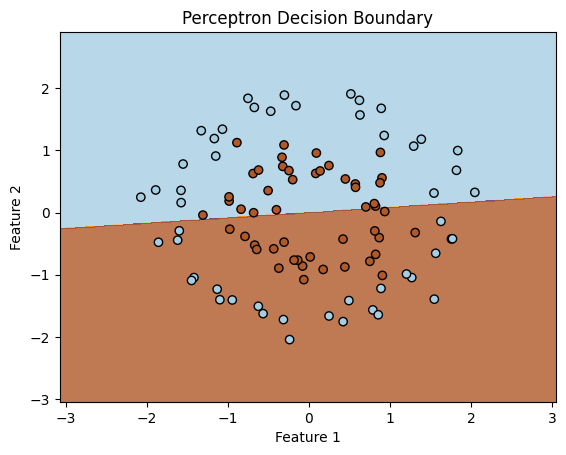

In [17]:
#3.Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# Create a toy dataset
X, y = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title("Toy Dataset: Non-Linearly Separable")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
scaler = StandardScaler()
X = scaler.fit_transform(X)
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X, y)
y_pred = perceptron.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy on the training set: {accuracy:.2f}")
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title("Perceptron Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
plot_decision_boundary(perceptron, X, y)


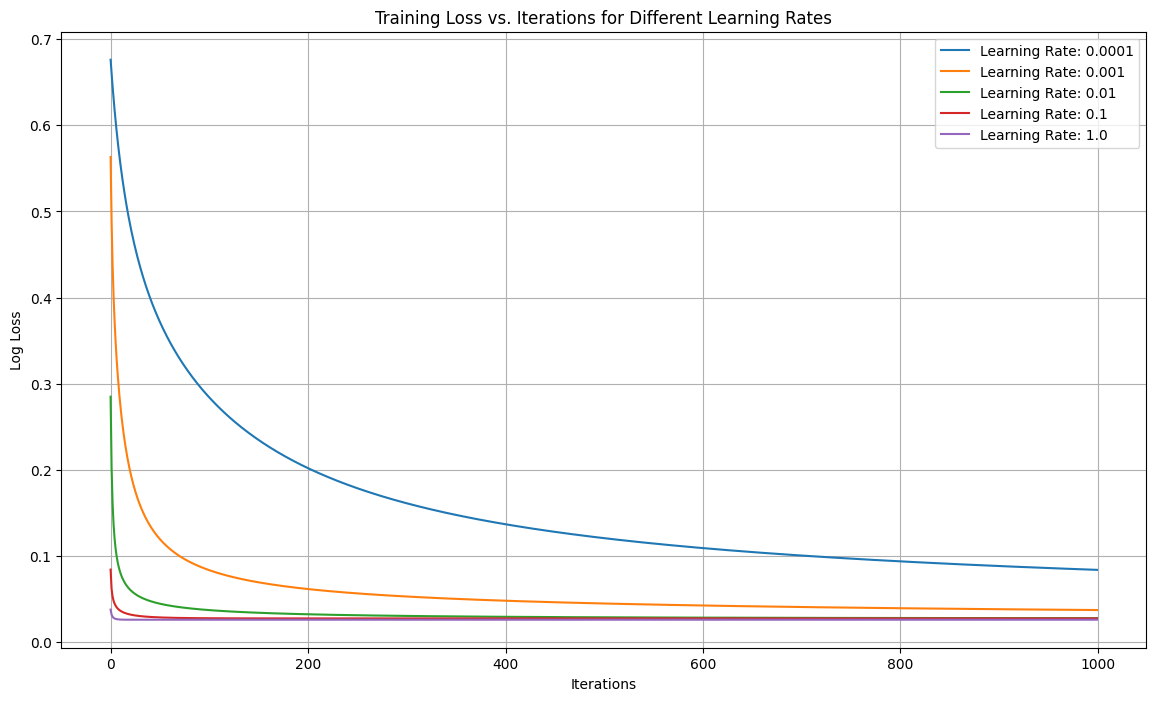

In [16]:
#2.Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
column_names = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
data = pd.read_csv(url, header=None, names=column_names)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
plt.figure(figsize=(14, 8))
for lr in learning_rates:
    model = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=lr, max_iter=1, warm_start=True, random_state=42)
    train_losses = []

    for epoch in range(1, 1001):
        model.partial_fit(X_train, y_train, classes=np.unique(y))
        y_train_pred = model.predict_proba(X_train)
        loss = log_loss(y_train, y_train_pred)
        train_losses.append(loss)

    plt.plot(train_losses, label=f'Learning Rate: {lr}')
plt.title("Training Loss vs. Iterations for Different Learning Rates")
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.legend()
plt.grid()
plt.show()


In [10]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [11]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


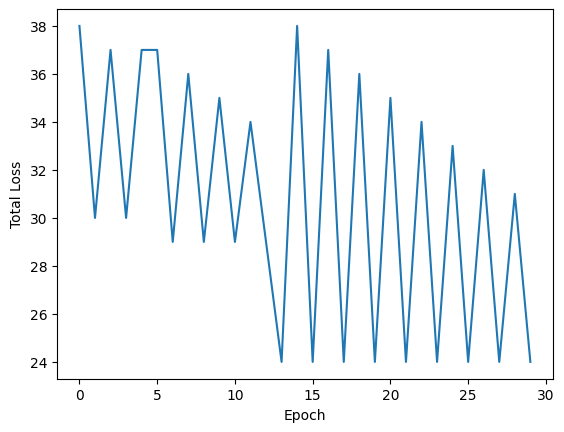

In [12]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

1.Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.




Answer:

i) Is this dataset learnable by a Perceptron?
Yes, this dataset is learnable by a Perceptron. The boolean function "AND" can be represented as a linearly separable function in a two-dimensional space. A Perceptron, being a linear classifier, can learn to separate the classes corresponding to the outputs of the "AND" function.

The "AND" function outputs + only when both inputs are 1, otherwise, it outputs -. The dataset and corresponding labels are:

x1    x2      y

0      0      -

0      1      -

1      0      -

1      1      +


This can be represented in a 2D space where the points (0, 0), (0, 1), and (1, 0) belong to class - (negative class), and the point (1, 1) belongs to class + (positive class). These points are linearly separable, making the problem suitable for a Perceptron.

ii) Weights Update Procedure for Each Iteration
The Perceptron algorithm updates the weights based on the following rule:

Initialization: Start with initial weights and bias set to zero:
w=(w1,w2)=(0,0), b=0

Compute the weighted sum:
z=w1x1+w2x2+b
Apply the activation function (sign function in this case) to get the predicted output:y^=sign(z)=sign(w1x1+w2x2+b)
if predicted output y does not match the actual label then update the weights and bias
w1=w1+nyx1
w2=w2+nyx2
b=b+ny
here, n=learning rate



Iteration by Iteration Update:
Let’s assume
n=1

Iteration 1:
(x1,x2)=(0,0),y=-,z=0,y^=0
update:
 w1=0+(-1)-0=0
 w2=0-(-1)-0=0
 b=0+(-1)=-1
 now ,w=(0,0),b=1

Iteration 2:
(x1,x2)=(0,1),y=-,z=1,y^=-1(correct,so no update)
New weights: w=(0,0),b=-1

Iteration 3:
(x1,x2)=(1,1),y=-,z=1
y^ =−1 (correct, so no update)
New weights: w=(0,0),b=-1
Iteration 4:
(x1,x2)=(1,1),y=+,z=-1,y^=-1 (incorrect, so update)
Update:
w1=0+(1)-1=1
w2=0+(1)-1=1
b=1+(1)=0
New weights:
w=(1,1),b=0
Final Weights:
After these updates, the final weights and bias would be w=(1,1) and
b=0, which correctly classifies all points. The Perceptron has learned the "AND" function.










2.Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.


Answer:


Understanding the Problem
For a 2-bit binary input  (x1,x2)∈{0,1}×{0,1}, there are 2^2=4 possible input combinations:(0,0), (0,1), (1,0), and (1,1).

A boolean function over this 2-bit input maps each of these 4 inputs to either -
or + (representing 0 and 1), resulting in
2^4=16 possible output configurations.

Linear Separability and Learnability by a Perceptron
A Perceptron can learn any boolean function that is linearly separable. This means the function must be such that a hyperplane (in this case, a line in 2D space) can separate the inputs mapped to - from those mapped to +.

Analysis of the 16 Possible Boolean Functions
1. Constant Functions (2 functions)
Function 1: Always - (all outputs are -).

Function 2: Always + (all outputs are +).

Both of these functions are trivially linearly separable since all points belong to a single class.

2. Single Positive or Negative Point (4 functions)
Function 3: -, -, -, +

Function 4: -, -, +, -

Function 5: -, +, -, -

Function 6: +, -, -, -

These functions are linearly separable because the single point of one class can be separated by a line from the other three points.

3. Two Points of the Same Class Together (6 functions)
Function 7: +, +, -, -

Function 8: +, -, +, -

Function 9: -, +, -, +

Function 10: -, -, +, +

Function 11: -, +, +, -

Function 12: +, -, -, +

Functions 7 and 10 (AND and OR functions) are linearly separable because a line can be drawn to separate the two points in the + class from those in the - class.

Functions 8 and 9 (XOR and XNOR) are not linearly separable. No straight line can separate the positive and negative classes.

Functions 11 and 12 are similar to XOR in terms of their separability; they are also not linearly separable.

4. Three Points of One Class, One of Another (4 functions)
Function 13: -, +, +, +

Function 14: +, -, +, +

Function 15: +, +, -, +

Function 16: +, +, +, -

Each of these functions is linearly separable since the one point of a different class can be separated from the other three.

Summary: Learnability by a Perceptron
Total Learnable Functions: 14 out of 16.
Not Learnable (XOR-like functions, which are not linearly separable):
Function 8: +, -, +, - (XOR)
Function 9: -, +, -, + (XNOR)
Function 11: -, +, +, -
Function 12: +, -, -, +
Truth Tables for the Not Learnable Functions
Function 8 (XOR)

x1   x2  y

0    0   -

0    1   +

1    0   +

1    1   -


Function 9 (XNOR)

x1   x2  y
0    0   +

0    1   -

1    0   -

1    1   +


Function 11

x1  x2  y

0   0   -

0   1   +

1   0   +

1   1   -


Function 12

x1  x2  y

0   0   +

0   1   -

1   0   -

1   1   +

Conclusion
Out of the 16 possible boolean functions over a 2-bit binary input, 14 are learnable by a Perceptron. The 2 functions that are not learnable are those that are not linearly separable (XOR and XNOR, plus their variants).






